In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [21]:
df=pd.read_csv("Concrete_Data.csv")

In [22]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [23]:
df.shape

(1030, 9)

In [24]:
data=df.to_numpy()
x=data[:,0:8]
y=data[:,8]
x.shape,y.shape

((1030, 8), (1030,))

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [26]:
#data preprocessing

scaler=StandardScaler()
xtrainscaled=scaler.fit_transform(xtrain)
xtestscaled=scaler.transform(xtest)

In [27]:
#hyperparameter tuning
paramgrid={
    'n_estimators': [50, 100, 150], # Number of trees in the forest
    'max_depth': [None, 10, 20], #Maximum depth of the trees
    'min_samples_split': [2, 5, 10],
# Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required to be at a Leaf node
    'max_features': ['sqrt', 'log2']
}

rfinitial=RandomForestRegressor(random_state=42)
gridsearch=GridSearchCV(estimator=rfinitial,param_grid=paramgrid,cv=5,n_jobs=-1)
gridsearch.fit(xtrainscaled,ytrain)
bestparams=gridsearch.best_params_

model=RandomForestRegressor(**bestparams,random_state=42)
model.fit(xtrainscaled,ytrain)

ytestpredict=model.predict(xtestscaled)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, ytestpredict)
r2 = r2_score(ytest, ytestpredict)

print("MSE:", mse)
print("R² Score:", r2)


MSE: 24.405460494695454
R² Score: 0.9020761243587327


visualizing model test predictions

TypeError: FigureBase.subplots_adjust() got an unexpected keyword argument 'uspace'

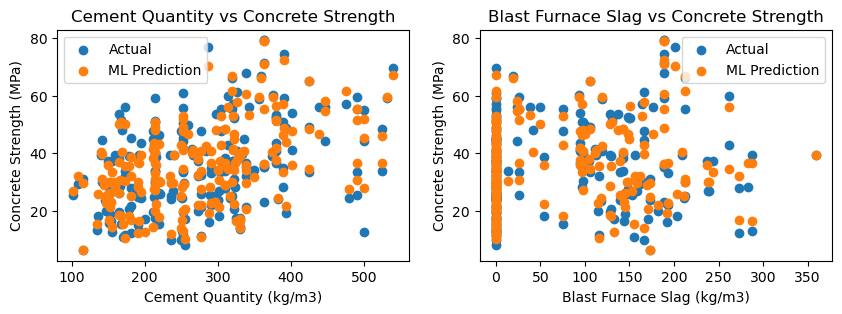

In [28]:
#create subplots 
fig, axes= plt.subplots(1, 2, figsize=(10, 3))
#Cement Quantity vs Concrete Strength 
axes[0].scatter(xtest[:,0],ytest,label='Actual')
axes[0].scatter(xtest[:,0], ytestpredict, label='ML Prediction') 
axes[0].set_xlabel('Cement Quantity (kg/m3)') 
axes[0].set_ylabel('Concrete Strength (MPa)') 
axes[0].set_title('Cement Quantity vs Concrete Strength') 
axes[0].legend()

#Blast Furnace Slag vs Concrete Strength 
axes[1].scatter(xtest[:,1], ytest, label='Actual') 
axes[1].scatter(xtest[:,1], ytestpredict, label='ML Prediction') 
axes[1].set_xlabel('Blast Furnace Slag (kg/m3)') 
axes[1].set_ylabel('Concrete Strength (MPa)') 
axes[1].set_title("Blast Furnace Slag vs Concrete Strength") 
axes[1].legend()
#adjust spacing between subplots 
fig.subplots_adjust(uspace=0.3)
#displayPLOT
plt.show()

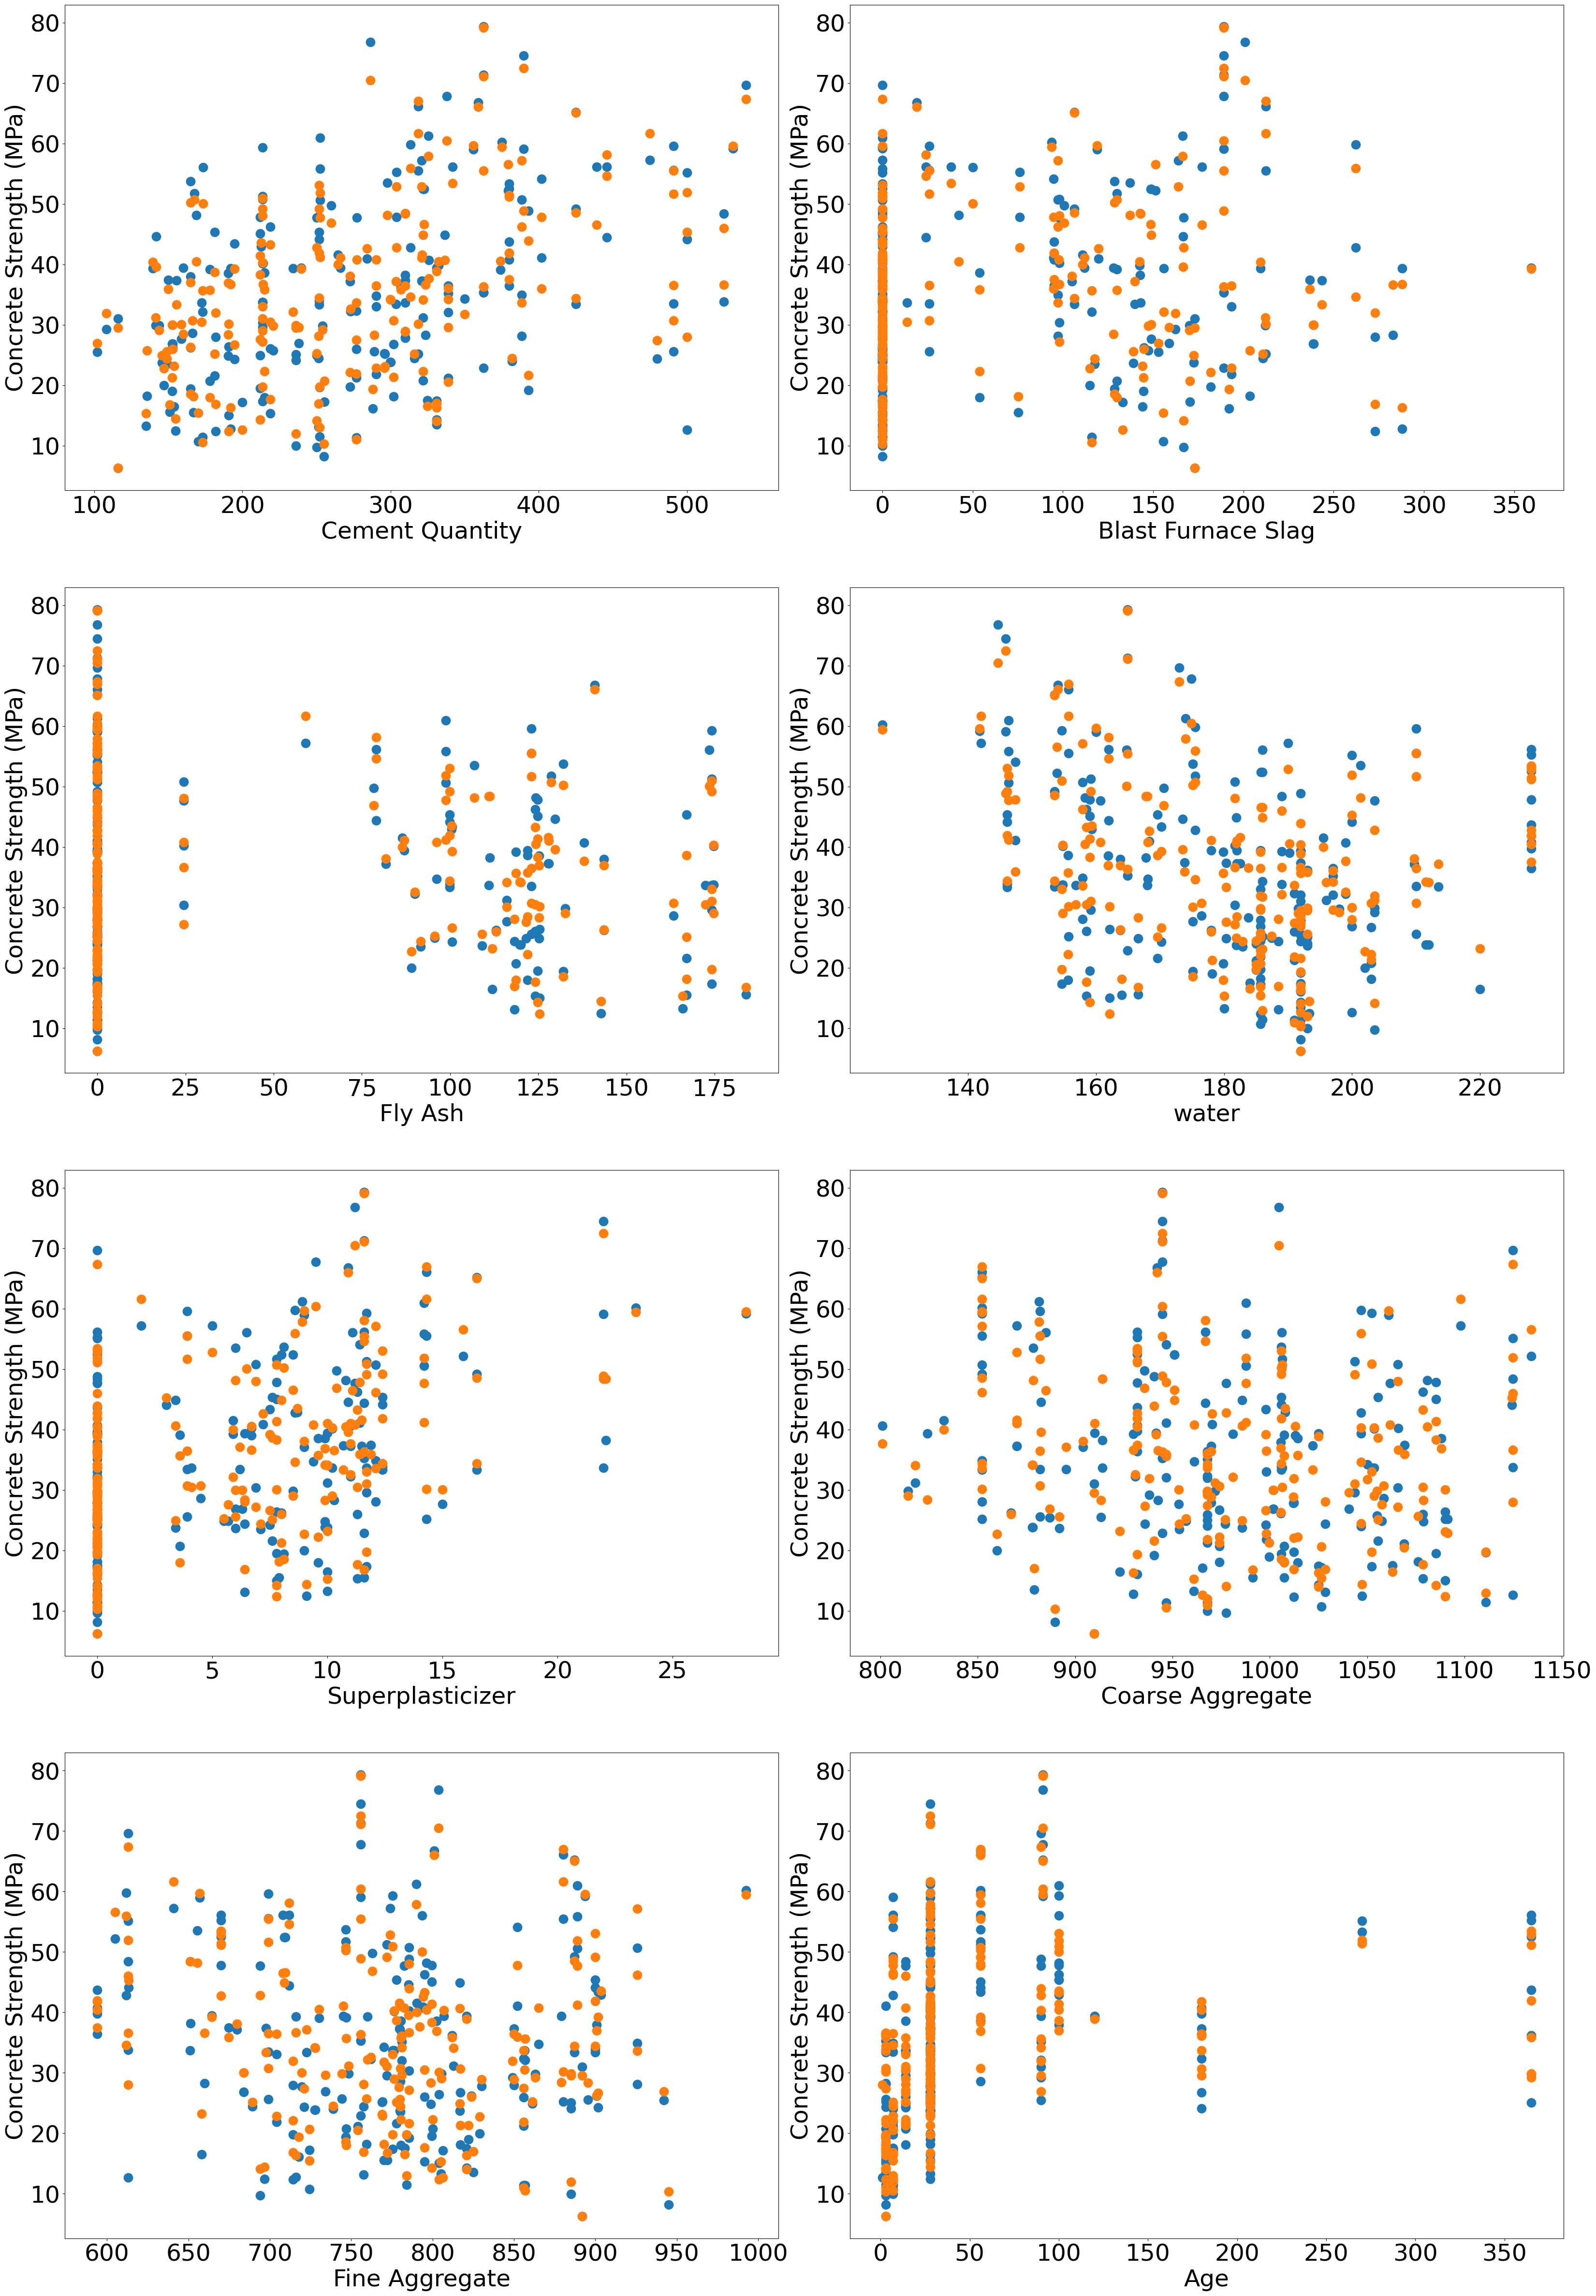

In [34]:
# Update font sizes of all subplots in one ga 
plt.rcParams.update({'font.size':35})
fig, axes= plt.subplots (4, 2, figsize=(40, 60))
featuretitle=['Cement Quantity', 'Blast Furnace Slag', 'Fly Ash', 'water', "Superplasticizer", 'Coarse Aggregate', "Fine Aggregate", "Age"]
for row in range(0, axes.shape[0]):
    for col in range(0, axes.shape[1]):
        featureid= row*axes.shape[1] +col
        axes [row,col].scatter(xtest[:, featureid], ytest, s=175)
        axes [row,col].scatter(xtest[:, featureid], ytestpredict, s=175) 
        axes[row,col].set_xlabel(featuretitle[featureid])
        axes[row,col].set_ylabel('Concrete Strength (MPa)')
# adjust spacing between subplots
fig.subplots_adjust(wspace=0.1)
#dispiny plat
plt.show()

In [35]:
import pickle

# Save model to a pickle file
with open('concrete_strength_model.pkl', 'wb') as file:
    pickle.dump(model, file)
